In [161]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [216]:
X, y,wt= make_regression(n_samples=2000,n_features=1, n_informative=1, noise=3,random_state=42, coef=True)
wt

array(87.73730719279554)

In [217]:
if y.ndim <2:
    y = y.reshape((len(y),1))


In [218]:
def basis(X):
    """
    Use a basis function to incorporate the bias weight, by adding a feature of all 1s to the X data.
    """
    onescol = np.ones((X.shape[0],1))
    return np.concatenate([onescol, X], axis=1)

def cost(X,y,w):
    return np.sum((y-X.dot(w).T).dot((y-X.dot(w))))

def derivative(X,y,w):
    #print(cost(X,y,w))
    return X.T.dot((y-X.dot(w)))

In [219]:
Xn = basis(X)
Xn.shape

(200, 2)

In [220]:
y.shape

(200, 1)

In [221]:
samplew = np.random.random((Xn.shape[1], y.shape[1]))
samplew

array([[ 0.73681341],
       [ 0.44423067]])

In [222]:
#example use
yp = Xn.dot(samplew)
yp.shape

(200, 1)

In [230]:
alpha = 0.0001
w=samplew.copy()
eps = 1e-6

Took 88 iterations
Best solution has cost  -14.4942574719
[[  0.42855289]
 [ 87.6260362 ]]


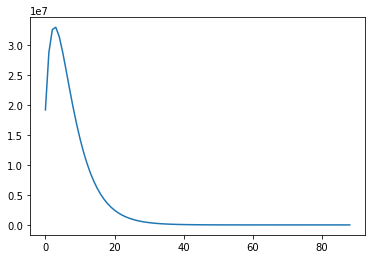

In [239]:
errors = []
w=samplew.copy()
for i in range(1000):
    adjustment = alpha*derivative(Xn, y, w)
    w += adjustment
    errors.append(-0.5*cost(Xn, y,w))
    if (i% 1000 == 0) and (i !=0) :
        print(-0.5*cost(Xn,y,w))
    if np.max(adjustment) < eps:
        print("Took "+str(i)+" iterations")
        print("Best solution has cost ",cost(Xn,y,w))
        print(w)
        break
plt.plot(errors)

[[ 0.73681341]
 [ 0.44423067]]


array([[  0.35689772],
       [ 87.13705046]])

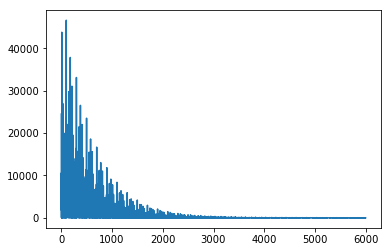

In [242]:
errors2 = []
w=samplew.copy()
print(w)
for t in range(30):
    for i in range(Xn.shape[0]):
        x_st = Xn[i,:].reshape(1,Xn.shape[1])
        y_st = y[i,:].reshape(1,y.shape[1])
        adjustment = alpha*derivative(x_st, y_st, w)
        w += adjustment
        errors2.append(cost(x_st, y_st,w))
        if (i% 1000 == 0) and (i !=0) :
            print(cost(Xn,y,w))
    

plt.plot(errors2)
w

In [172]:
wt

array(41.7411003148779)

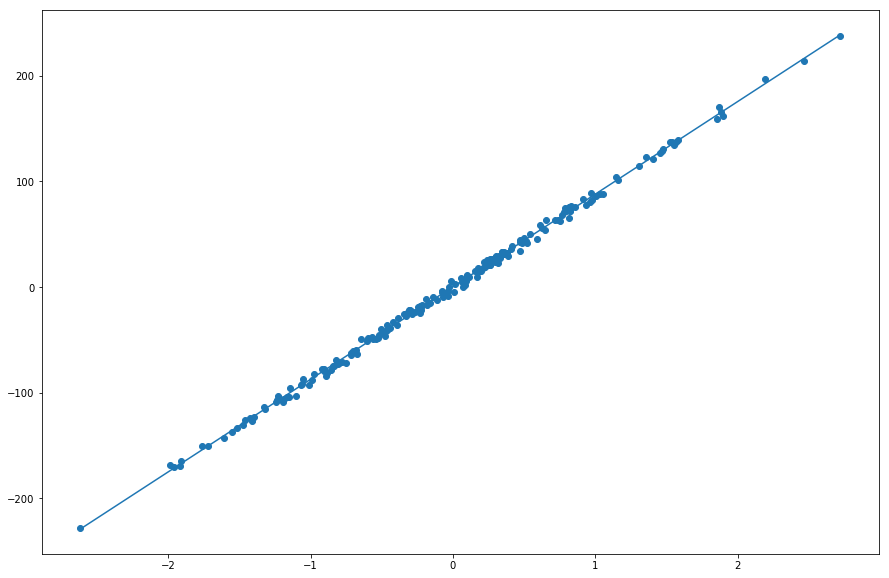

In [237]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(X, y)
xs = np.linspace(np.min(X), np.max(X), 300).reshape(len(xs),1)
xsn = basis(xs)
ys = xsn.dot(w)
ax.plot(xs, ys)